In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
from keras import layers, models
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

Database selection and preparation

In [2]:
dataset_path = './dataset'

Filter classes with more then 5 images

In [54]:
class_image_counts = {}
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        class_image_counts[class_name] = len(class_images)
classes_with_more_then_10_images = [class_name for class_name, count in class_image_counts.items() if count > 20]
print("Classes with more then 10 images:")
for class_name in classes_with_more_then_10_images:
    print(f"{class_name}: {class_image_counts[class_name]} images")

Classes with more then 10 images:
Alejandro_Toledo: 39 images
Alvaro_Uribe: 35 images
Amelie_Mauresmo: 21 images
Andre_Agassi: 36 images
Ariel_Sharon: 77 images
Arnold_Schwarzenegger: 42 images
Atal_Bihari_Vajpayee: 24 images
Bill_Clinton: 29 images
Carlos_Menem: 21 images
Colin_Powell: 236 images
David_Beckham: 31 images
Donald_Rumsfeld: 121 images
George_Robertson: 22 images
George_W_Bush: 530 images
Gerhard_Schroeder: 109 images
Gloria_Macapagal_Arroyo: 44 images
Gray_Davis: 26 images
Guillermo_Coria: 30 images
Hamid_Karzai: 22 images
Hans_Blix: 39 images
Hugo_Chavez: 71 images
Jack_Straw: 28 images
Jacques_Chirac: 52 images
Jean_Chretien: 55 images
Jennifer_Aniston: 21 images
Jennifer_Capriati: 42 images
Jennifer_Lopez: 21 images
Jeremy_Greenstock: 24 images
John_Ashcroft: 53 images
John_Negroponte: 31 images
Jose_Maria_Aznar: 23 images
Juan_Carlos_Ferrero: 28 images
Junichiro_Koizumi: 60 images
Kofi_Annan: 32 images
Laura_Bush: 41 images
Lindsay_Davenport: 22 images
Lleyton_Hewitt

In [55]:
import os
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
for class_name in classes_with_more_then_10_images:
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        class_images = os.listdir(class_path)
        if len(class_images) > 0:
            image_path = os.path.join(class_path, class_images[0])
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.title(f"Class: {class_name}")
            plt.show()


Image preprocessing

In [56]:

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
batch_size = 32
image_size = (100, 100)
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes= classes_with_more_then_10_images,
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    classes= classes_with_more_then_10_images,
    subset='validation'
)

Found 2362 images belonging to 57 classes.
Found 561 images belonging to 57 classes.


Images for training

In [ ]:
print("Training images:")
for filename in train_generator.filenames:
    print(filename)

Images for validation

In [101]:
print("Validation images:")
for filename in validation_generator.filenames:
    print(filename)

Validation images:
Alejandro_Toledo\Alejandro_Toledo_0001.jpg
Alejandro_Toledo\Alejandro_Toledo_0002.jpg
Alejandro_Toledo\Alejandro_Toledo_0003.jpg
Alejandro_Toledo\Alejandro_Toledo_0004.jpg
Alejandro_Toledo\Alejandro_Toledo_0005.jpg
Alejandro_Toledo\Alejandro_Toledo_0006.jpg
Alejandro_Toledo\Alejandro_Toledo_0007.jpg
Alvaro_Uribe\Alvaro_Uribe_0001.jpg
Alvaro_Uribe\Alvaro_Uribe_0002.jpg
Alvaro_Uribe\Alvaro_Uribe_0003.jpg
Alvaro_Uribe\Alvaro_Uribe_0004.jpg
Alvaro_Uribe\Alvaro_Uribe_0005.jpg
Alvaro_Uribe\Alvaro_Uribe_0006.jpg
Alvaro_Uribe\Alvaro_Uribe_0007.jpg
Amelie_Mauresmo\Amelie_Mauresmo_0001.jpg
Amelie_Mauresmo\Amelie_Mauresmo_0002.jpg
Amelie_Mauresmo\Amelie_Mauresmo_0003.jpg
Amelie_Mauresmo\Amelie_Mauresmo_0004.jpg
Andre_Agassi\Andre_Agassi_0001.jpg
Andre_Agassi\Andre_Agassi_0002.jpg
Andre_Agassi\Andre_Agassi_0003.jpg
Andre_Agassi\Andre_Agassi_0004.jpg
Andre_Agassi\Andre_Agassi_0005.jpg
Andre_Agassi\Andre_Agassi_0006.jpg
Andre_Agassi\Andre_Agassi_0007.jpg
Ariel_Sharon\Ariel_Sharon_

Image processing preview

In [57]:
processed_images, _ = train_generator.next()
for i in range(len(processed_images)):
    processed_img = processed_images[i]
    image_name = train_generator.filenames[i]
    plt.imshow(processed_img)
    plt.title(f"Processed Image {i+1}\n{image_name}")
    plt.show()

Implementation of the CNN (selected deep learning method)

In [58]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

In [79]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=60,
    validation_data=validation_generator
)

Epoch 1/60
74/74 [==============================] - 36s 482ms/step - loss: 1.1001 - accuracy: 0.6613 - val_loss: 1.1381 - val_accuracy: 0.6970
Epoch 2/60
74/74 [==============================] - 32s 429ms/step - loss: 0.9935 - accuracy: 0.6871 - val_loss: 1.1260 - val_accuracy: 0.7005
Epoch 3/60
74/74 [==============================] - 31s 418ms/step - loss: 0.9685 - accuracy: 0.7003 - val_loss: 1.1256 - val_accuracy: 0.6845
Epoch 4/60
74/74 [==============================] - 33s 440ms/step - loss: 0.9745 - accuracy: 0.7015 - val_loss: 1.0638 - val_accuracy: 0.7112
Epoch 5/60
74/74 [==============================] - 32s 429ms/step - loss: 0.9338 - accuracy: 0.7142 - val_loss: 1.1387 - val_accuracy: 0.6952
Epoch 6/60
74/74 [==============================] - 33s 445ms/step - loss: 0.9479 - accuracy: 0.7049 - val_loss: 1.1053 - val_accuracy: 0.7059
Epoch 7/60
74/74 [==============================] - 36s 484ms/step - loss: 0.9280 - accuracy: 0.7261 - val_loss: 1.0697 - val_accuracy: 0.7166

Evaluation

In [80]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

18/18 [==============================] - 4s 211ms/step - loss: 0.8336 - accuracy: 0.7914
Validation Accuracy: 79.14%


In [81]:
test_data, test_labels = validation_generator.next()
predictions = model.predict(test_data)
true_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 140ms/step


Confusion matrix

Text(33.22222222222222, 0.5, 'Truth')

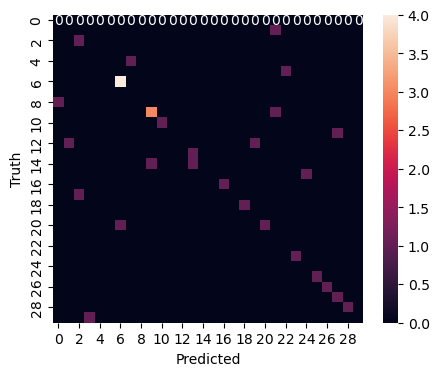

In [82]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize = (5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Saving the model

In [83]:
model.save('model.keras')

Predicting for a given image

In [102]:
from keras.preprocessing import image
import numpy as np
model = tf.keras.models.load_model('model.keras')
from PIL import Image
image_path = "George_W_Bush_0075.jpg"
img = Image.open(image_path)
img = img.resize(image_size)
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)
class_labels = {v: k for k, v in train_generator.class_indices.items()}
predicted_label = class_labels[predicted_class[0]]
print("Predicted class:", predicted_label)

1/1 [==============================] - 0s 131ms/step
Predicted class: George_W_Bush
